# AI Search Algorithms

## Problem formulation

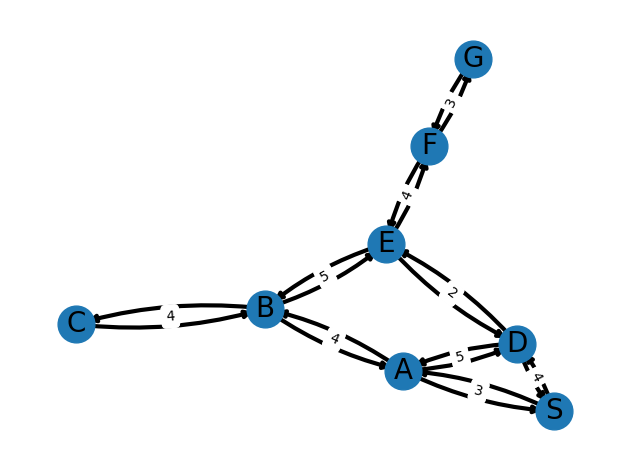

In [1]:
import sys
sys.path.insert(1, './libppj')

from ppj_graph import PPjGraph as G

g = G(8)

g.addNode('S')
g.addNode('A')
g.addNode('B')
g.addNode('C')
g.addNode('D')
g.addNode('E')
g.addNode('F')
g.addNode('G')

startNode  = 'S'
goalNode = 'G'

g.addEdge('S', 'A', 3)
g.addEdge('A', 'S', 3)

g.addEdge('S', 'D', 4)
g.addEdge('D', 'S', 4)

g.addEdge('A', 'D', 5)
g.addEdge('D', 'A', 5)

g.addEdge('A', 'B', 4)
g.addEdge('B', 'A', 4)

g.addEdge('B', 'C', 4)
g.addEdge('C', 'B', 4)

g.addEdge('D', 'E', 2)
g.addEdge('E', 'D', 2)

g.addEdge('B', 'E', 5)
g.addEdge('E', 'B', 5)

g.addEdge('E', 'F', 4)
g.addEdge('F', 'E', 4)

g.addEdge('F', 'G', 3)
g.addEdge('G', 'F', 3)

g.plotGraph()

## Breadth First Search

In [2]:
import sys
sys.path.insert(1, './libppj')

from ppj_queue import PPjQueue as Q

def bfs(graph: G, startNode): 
    q = Q()
    q.enqueue(startNode)
    
    closedList = [] # List for visited nodes.
    closedList.append(startNode)

    while not q.isEmpty():          
        currentNode = q.dequeue()[0] 
        print (currentNode, end = " ") 

        for succ in graph.successor(currentNode):
            if succ not in closedList:
                closedList.append(succ)
                q.enqueue(succ)

In [3]:
bfs(g, 'S')

S A D B E C F G 

## Depth First Search

In [4]:
import sys
sys.path.insert(1, './libppj')

from ppj_stack import PPjStack as S

def dfs(graph: G, startNode): 
    s = S()
    s.push(startNode)
    
    closedList = [] # List for visited nodes.
    closedList.append(startNode)

    while not s.isEmpty():          
        currentNode = s.pop()[0] 
        print (currentNode, end = " ") 
        
        if goalNode in closedList:
            break

        for succ in graph.successor(currentNode):
            if succ not in closedList:
                closedList.append(succ)
                s.push(succ)

In [5]:
dfs(g, 'S')

S D E F G 

## Heuristic values

In [2]:
g.setGoalCost('S', 11.9)
g.setGoalCost('A', 10.4)
g.setGoalCost('B',  6.7)
g.setGoalCost('C',  4.0)
g.setGoalCost('D',  8.9)
g.setGoalCost('E',  6.9)
g.setGoalCost('F',  3.0)
g.setGoalCost('G',  0.0)

In [3]:
print(g.goalCosts)

{'S': 11.9, 'A': 10.4, 'B': 6.7, 'C': 4.0, 'D': 8.9, 'E': 6.9, 'F': 3.0, 'G': 0.0}


## Greedy best first search

In [9]:
def greedyBFS(graph: G, startNode, goalNode):
    
    currentNode = startNode    
    closedList = []
    
    print("|{:<12}|{:^20}|{:^20}|{:^12}|{:>12}|".format('current node', 'successors', 'costs',
                                                        'min cost', 'min node'))       
    while not currentNode == goalNode:
        
        closedList.append(currentNode)        
        validSuccessors = []
        
        for succ in graph.successor(currentNode):
            if succ not in closedList:
                validSuccessors.append(succ)
        
        # if valid successors is empty, then ???
        
        goalCosts = [graph.goalCosts[node] for node in validSuccessors]        
        minGoalCost = min(goalCosts)        
        minGoalCostNode = validSuccessors[goalCosts.index(minGoalCost)]
        
        print("|{:<12}|{:^20}|{:^20}|{:^12}|{:>12}|".format(currentNode, 
                                                            ' '.join(validSuccessors),
                                                            ' '.join([str(cost) for cost in goalCosts]),
                                                            minGoalCost, minGoalCostNode))        
        currentNode = minGoalCostNode              

In [10]:
greedyBFS(g, 'S', 'G')

|current node|     successors     |       costs        |  min cost  |    min node|
|S           |        A D         |      10.4 8.9      |    8.9     |           D|
|D           |        A E         |      10.4 6.9      |    6.9     |           E|
|E           |        B F         |      6.7 3.0       |    3.0     |           F|
|F           |         G          |        0.0         |    0.0     |           G|
